# Demonstrate transformation of input variables to nonlinear function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Define function

Here our nonlinear function is the [Michaelis-Menton](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics) equation:
\begin{equation*}
V = V_{max}\frac{S}{K_s + S}
\end{equation*}

Define using an [anonymous function](https://en.wikipedia.org/wiki/Anonymous_function#Python):

In [2]:
f = lambda S, Vmax, Ks: Vmax * S / (S + Ks)

## Generate some psuedo data

Let's assume that we're working with a lognormally distributed quantity, like chlorophyll. We can draw 10,000 samples from a lognormal distribution, making using of NumPy's [`lognormal`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.lognormal.html) function. Let's assume these are our observations. We'll generate the data and plot a histogram.

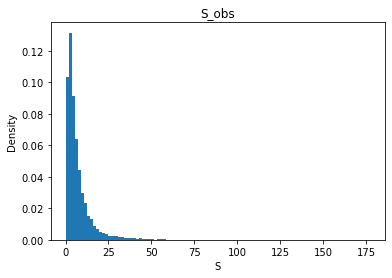

In [3]:
mu_obs = 1.5
sigma_obs = 0.95
S_obs = np.random.lognormal(mean=mu_obs, sigma=sigma_obs, size=10000)

plt.figure()
plt.hist(S_obs, 100, density=True);
plt.title('S_obs')
plt.xlabel('S')
plt.ylabel('Density');

### Parameterize the function


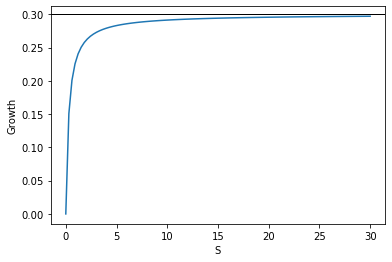

In [4]:
Vmax = 0.3
Ks = 0.3

s = np.linspace(0, Ks*100, 100)
plt.figure()
plt.plot(s, f(s, Vmax, Ks), '-')
plt.axhline(Vmax, linewidth=1, color='k')
plt.xlabel('S')
plt.ylabel('Growth');

### Apply the function to our generated dataset

Text(0, 0.5, 'Density')

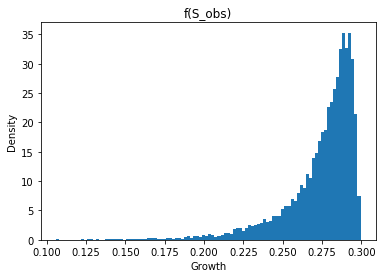

In [5]:
plt.figure()
plt.hist(f(S_obs, Vmax, Ks), 100, density=True)
plt.title('f(S_obs)')
plt.xlabel('Growth')
plt.ylabel('Density')

### Generate new dataset with different mean and variance

Imagine the Earth system model simulates chlorophyll with reduced mean and variance. Let's generated a simulated dataset with these properties.

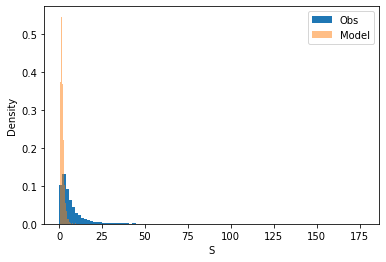

In [6]:
mu_sim = 0.5
sigma_sim = 0.5
S_sim = np.random.lognormal(mean=mu_sim, sigma=sigma_sim, size=10000)

plt.figure()
plt.hist(S_obs, 100, density=True, label='Obs');
plt.hist(S_sim, 100, density=True, alpha=0.5, label='Model');
plt.xlabel('S')
plt.ylabel('Density');
plt.legend();

### Compute transformed data

We can apply a tranform to the data that looks like this
\begin{equation*}
S_{trans} = \frac{\sigma_{obs}}{\sigma_{sim}}(S_{sim} - \mu_{sim})+\mu_{obs}
\end{equation*}
But since our data is lognormally distributed, we'll apply a logtransform first and take the exponential after.

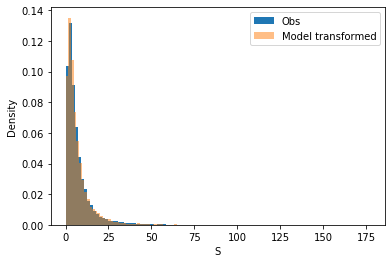

In [7]:
S_transformed = np.exp(sigma_obs * (np.log(S_sim) - mu_sim) / sigma_sim + mu_obs)

plt.figure()
plt.hist(S_obs, 100, density=True, label='Obs');
plt.hist(S_transformed, 100, density=True, alpha=0.5, label='Model transformed');
plt.xlabel('S')
plt.ylabel('Density');
plt.legend();

Now we can compute the function on the transformed model data to retain the same mean and variance as if applied to the observations.

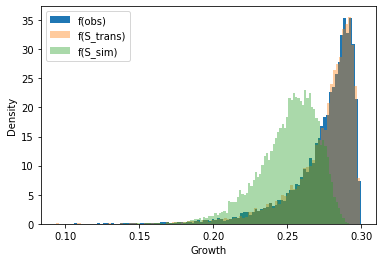

In [8]:
plt.figure()
plt.hist(f(S_obs, Vmax, Ks), 100, density=True, label='f(obs)');
plt.hist(f(S_transformed, Vmax, Ks), 100, density=True, alpha=0.4, label='f(S_trans)');
plt.hist(f(S_sim, Vmax, Ks), 100, density=True, alpha=0.4, label='f(S_sim)');

plt.xlabel('Growth')
plt.ylabel('Density')
plt.legend();